# Exploratory Data Analysis and Preprocessing

The Stock Market Manipulation Dataset can be found at the following [link](https://www.kaggle.com/code/neeoon/stock-market-manipulation-supervised-learning/input).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

seed = 42
np.random.seed(seed)

In [2]:
train_df = pd.read_csv('./data/FLC_labeled_notime.csv', delimiter=';')
test_df = pd.read_csv('./data/flc_2013_2022_notime.csv', delimiter=';')

In [3]:
train_df = train_df.sample(frac=1).reset_index(drop=True)
test_df = test_df.sample(frac=1).reset_index(drop=True)

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   open         329 non-null    int64  
 1   high         329 non-null    int64  
 2   low          329 non-null    int64  
 3   close        329 non-null    int64  
 4   Volume       329 non-null    int64  
 5   Volume MA    329 non-null    float64
 6   manipulated  329 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 18.1 KB


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2170 entries, 0 to 2169
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   open         2170 non-null   float64
 1   high         2170 non-null   float64
 2   low          2170 non-null   float64
 3   close        2170 non-null   float64
 4   Volume       2170 non-null   int64  
 5   Volume MA    2151 non-null   float64
 6   manipulated  2170 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 118.8 KB


In [6]:
train_df.describe()

,open,high,low,close,Volume,Volume MA,manipulated
count,329.000000,329.000000,329.000000,329.000000,3.290000e+02,3.290000e+02,329.000000
mean,11519.635258,11863.221884,11240.151976,11547.142857,2.516072e+07,2.507855e+07,0.085106
std,3288.529935,3387.497811,3185.975218,3278.301777,1.620454e+07,6.674348e+06,0.279465
min,4380.000000,4530.000000,4380.000000,4390.000000,4.404000e+05,1.208365e+07,0.000000
25%,10500.000000,10900.000000,10300.000000,10550.000000,1.502890e+07,2.036324e+07,0.000000
50%,11700.000000,12100.000000,11400.000000,11800.000000,2.237520e+07,2.435282e+07,0.000000
75%,13050.000000,13400.000000,12800.000000,13050.000000,3.129210e+07,2.948696e+07,0.000000
max,23600.000000,24100.000000,21000.000000,22550.000000,1.549412e+08,4.092126e+07,1.000000


In [7]:
test_df.describe()

,open,high,low,close,Volume,Volume MA,manipulated
count,2170.000000,2170.000000,2170.000000,2170.000000,2.170000e+03,2.151000e+03,2170.000000
mean,6717.912760,6863.198856,6581.406702,6707.506694,1.364422e+07,1.367749e+07,0.012903
std,2893.535984,2986.828914,2807.352002,2900.443175,1.191747e+07,8.117341e+06,0.112883
min,2480.000000,2650.000000,2430.000000,2480.000000,4.404000e+05,2.513635e+06,0.000000
25%,4702.209521,4820.000000,4609.991323,4699.888816,5.550250e+06,7.110853e+06,0.000000
50%,6090.000000,6192.499129,5992.132667,6070.000000,9.917631e+06,1.173159e+07,0.000000
75%,7863.037552,8012.809696,7704.621009,7863.037552,1.805618e+07,1.846937e+07,0.000000
max,23600.000000,24100.000000,21000.000000,22550.000000,1.549412e+08,4.092126e+07,1.000000


## Inference

The train data consists of `329` data points and the test data has `2170` data points. We can observe that there are no null values in the train data. However, there are some null values in the test data for `Volume MA` column. The target column `manipulated` is binary and indicates whether the stock price was manipulated or not. 

Next we check the number of manipulated and non-manipulated stocks.

In [8]:
target = 'manipulated'

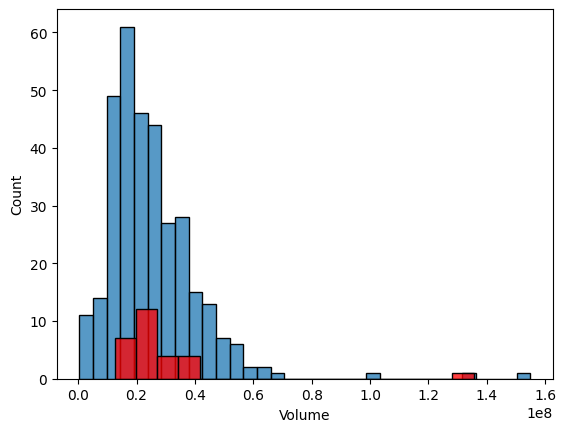

In [9]:
sns.histplot(data=train_df['Volume']) # All data
sns.histplot(data=train_df[train_df[target] == 1]['Volume'], color='red') # Only manipulated ticker
plt.show()

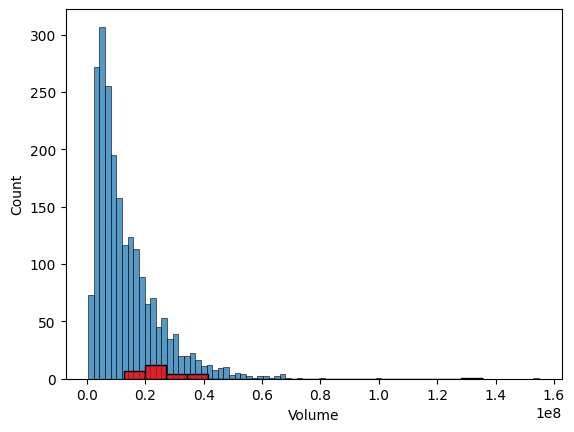

In [10]:
sns.histplot(data=test_df['Volume']) # All data
sns.histplot(data=test_df[test_df[target] == 1]['Volume'], color='red') # Only manipulated ticker
plt.show()

In [11]:
train_df[target].value_counts()/train_df.shape[0]*100 

manipulated
0    91.489362
1     8.510638
Name: count, dtype: float64

## Inference

The test dataset contains around `8.5` percent of manipulated stocks. More than `90` percent of the stocks price are legitimate. This can be a problem for a Machine Learning model as the dataset is imbalanced and can make the model biased towards legitimate stocks.

To tackle this problem, we use Synthetic Minority Over-sampling Technique (SMOTE) to generate synthetic data points for the minority class, which can help balance the dataset. Before SMOTE, we perform standard scaling (subtracting the mean and dividing by the standard deviation) of the dataset.

In [12]:
X = train_df.drop(target, axis=1)
y = train_df[target]

In [13]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns = list(X))

In [14]:
scaled_df = X_scaled.copy()
scaled_df[target] = y
scaled_df

,open,high,low,close,Volume,Volume MA,manipulated
0,-1.985558,-1.975913,-1.977333,-1.945166,-0.065608,-1.142805,0
1,-0.280075,-0.284779,-0.216952,-0.304628,-0.920953,-1.528220,0
2,-0.234393,-0.255214,-0.154081,-0.197703,-1.224441,-0.249518,0
3,-1.166317,-1.216086,-1.191448,-1.175305,0.508240,-0.933327,0
4,0.222433,0.129135,0.175990,0.077248,-0.074792,0.256490,0
...,...,...,...,...,...,...,...
324,-0.082118,-0.107388,0.003096,-0.090777,-0.884964,-1.391388,0
325,0.450846,0.483918,0.317450,0.382749,0.782692,2.299894,0
326,0.511756,0.513483,0.553215,0.489674,-0.487675,0.298255,0
327,0.146295,0.158700,0.113120,0.138348,0.242627,1.560032,0


In [15]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=seed)

In [16]:
X = scaled_df.drop(target, axis=1)
y = scaled_df[target]

X_train, y_train = sm.fit_resample(X, y)

In [17]:
print('After OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train == 0)))

After OverSampling, the shape of train_X: (602, 6)
After OverSampling, the shape of train_y: (602,) 

After OverSampling, counts of label '1': 301
After OverSampling, counts of label '0': 301


In [18]:
df_smote = X_train.copy()
df_smote[target] = y_train
df_smote

,open,high,low,close,Volume,Volume MA,manipulated
0,-1.985558,-1.975913,-1.977333,-1.945166,-0.065608,-1.142805,0
1,-0.280075,-0.284779,-0.216952,-0.304628,-0.920953,-1.528220,0
2,-0.234393,-0.255214,-0.154081,-0.197703,-1.224441,-0.249518,0
3,-1.166317,-1.216086,-1.191448,-1.175305,0.508240,-0.933327,0
4,0.222433,0.129135,0.175990,0.077248,-0.074792,0.256490,0
...,...,...,...,...,...,...,...
597,2.171766,2.154640,2.250951,2.170264,0.069741,-0.141388,1
598,1.213041,1.194181,1.182768,1.055672,-0.274618,0.671137,1
599,1.085354,1.119588,1.138272,1.037882,-0.385247,0.566027,1
600,1.079848,0.983113,0.969087,0.929121,-0.122136,0.664320,1


In [27]:
df_smote[target].value_counts()/df_smote.shape[0]*100 

manipulated
0    50.0
1    50.0
Name: count, dtype: float64

## Inference

After using SMOTE, the number of data points increased to `602` and we have balanced the classes as well.

Next, we check the correlation of the columns. This can help in reducing the number of features (columns) of the dataset. This is essential for a Quantum Machine Learning model too.

Text(0.5, 1.0, 'After SMOTE')

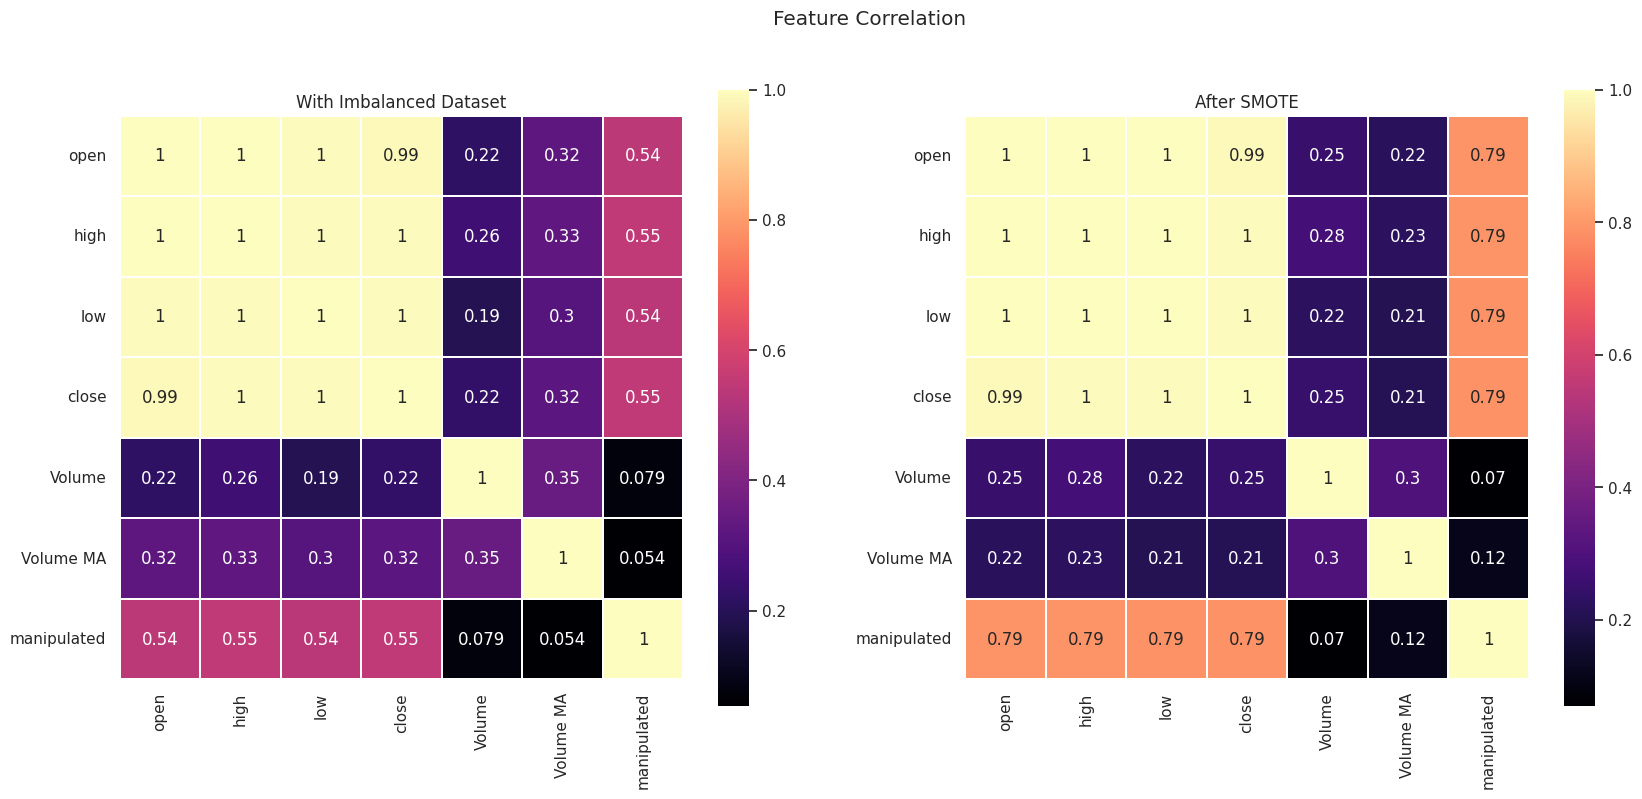

In [19]:
#Plot a heatmap
sns.set(font_scale=1)
colormap = plt.cm.magma

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(20,8))
fig.suptitle('Feature Correlation')

#Imbalanced Dataset
sns.heatmap(train_df.corr(method='pearson'), 
            ax=axes[0], 
            linewidths=0.1, 
            vmax=1.0, 
            square=True, 
            cmap=colormap, 
            linecolor='white', 
            annot=True)

axes[0].set_title('With Imbalanced Dataset')

#Data after SMOTE
sns.heatmap(df_smote.corr(method='pearson'), 
            ax=axes[1], 
            linewidths=0.1, 
            vmax=1.0, 
            square=True, 
            cmap=colormap, 
            linecolor='white', 
            annot=True)

axes[1].set_title('After SMOTE')

## Inference

From the above two heatmaps, we can observe that the pearson's correlation coefficient values for imbalanced dataset and dataset obtained after SMOTE. The correlation of the target with other features (open, high, low etc.) has increased.

We can observe that the columns open, high, low and close are highly positively correlated. In such cases, we can consider removing them except one to avoid multicollinearity.

A more better approach can be to analyze feature importance to determine which columns contribute the most to the model's performance. 

Here we remove the open, high and low features and perform the same preprocessing steps with the test data as well.

In [20]:
new_df = df_smote.drop(['open', 'high', 'low'], axis=1)

In [21]:
new_df.describe()

,close,Volume,Volume MA,manipulated
count,602.000000,602.000000,602.000000,602.000000
mean,0.783950,0.038220,0.073043,0.500000
std,1.206331,0.885030,0.772345,0.500416
min,-2.186512,-1.527842,-1.949958,0.000000
25%,0.000873,-0.430154,-0.181166,0.000000
50%,0.945916,-0.122242,0.046130,0.500000
75%,1.830232,0.325210,0.514447,1.000000
max,3.361380,8.021097,2.377287,1.000000


In [22]:
new_df.corr()

,close,Volume,Volume MA,manipulated
close,1.000000,0.246312,0.211670,0.788653
Volume,0.246312,1.000000,0.299665,0.070439
Volume MA,0.211670,0.299665,1.000000,0.116075
manipulated,0.788653,0.070439,0.116075,1.000000


In [23]:
X = test_df.drop(target, axis=1)
y = test_df[target]

X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled, columns = list(X))
X_scaled[target] = y

imputer = KNNImputer(n_neighbors=2)
volume_ma = imputer.fit_transform(np.array(X_scaled['Volume MA']).reshape(-1,1))

X_scaled = X_scaled.drop('Volume MA', axis = 1)
X_scaled['Volume MA'] = volume_ma

new_test_df = X_scaled.drop(['open', 'high', 'low'], axis=1)

In [24]:
new_test_df.describe()

,close,Volume,manipulated,Volume MA
count,2170.000000,2170.000000,2170.000000,2170.000000
mean,-1.478512,-0.711779,0.012903,-1.710792
std,0.886087,0.736561,0.112883,1.212706
min,-2.770018,-1.527842,0.000000,-3.385991
25%,-2.091840,-1.212028,0.000000,-2.690130
50%,-1.673271,-0.942101,0.000000,-1.992020
75%,-1.125496,-0.439097,0.000000,-1.000010
max,3.361380,8.021097,1.000000,2.377287


In [25]:
new_test_df.corr()

,close,Volume,manipulated,Volume MA
close,1.000000,0.501910,0.422006,0.679159
Volume,0.501910,1.000000,0.150683,0.614141
manipulated,0.422006,0.150683,1.000000,0.178088
Volume MA,0.679159,0.614141,0.178088,1.000000


## Save the preprocessed data

In [26]:
new_df.to_csv('data/processed_train.csv', index=False)
new_test_df.to_csv('data/processed_test.csv', index=False)